<a href="https://colab.research.google.com/github/SUBAPARVATHIM/Wine_Quality_Analysis/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('winequality.csv')

# Display the first few rows of the dataset
print(data.head())

# Handle missing values - Example: Imputation with mean value
data.fillna(data.mean(), inplace=True)

# Detect and handle outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Dataset shape after outlier removal: {data.shape}")


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0 

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1065.000000       1065.000000  1065.000000     1065.000000   
mean        8.210892          0.519685     0.251991        2.201174   
std         1.518165          0.165080     0.180481        0.449510   
min         5.000000          0.120000     0.000000        1.200000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.240000        2.150000   
75%         9.100000          0.630000     0.400000        2.500000   
max        12.300000          1.005000     0.730000        3.600000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1065.000000          1065.000000           1065.000000  1065.000000   
mean      0.078162            15.180282             41.134272     0.996577   
std       0.014491             8.993909             25.443801     0.001673   
min       0.041000             1.000000         

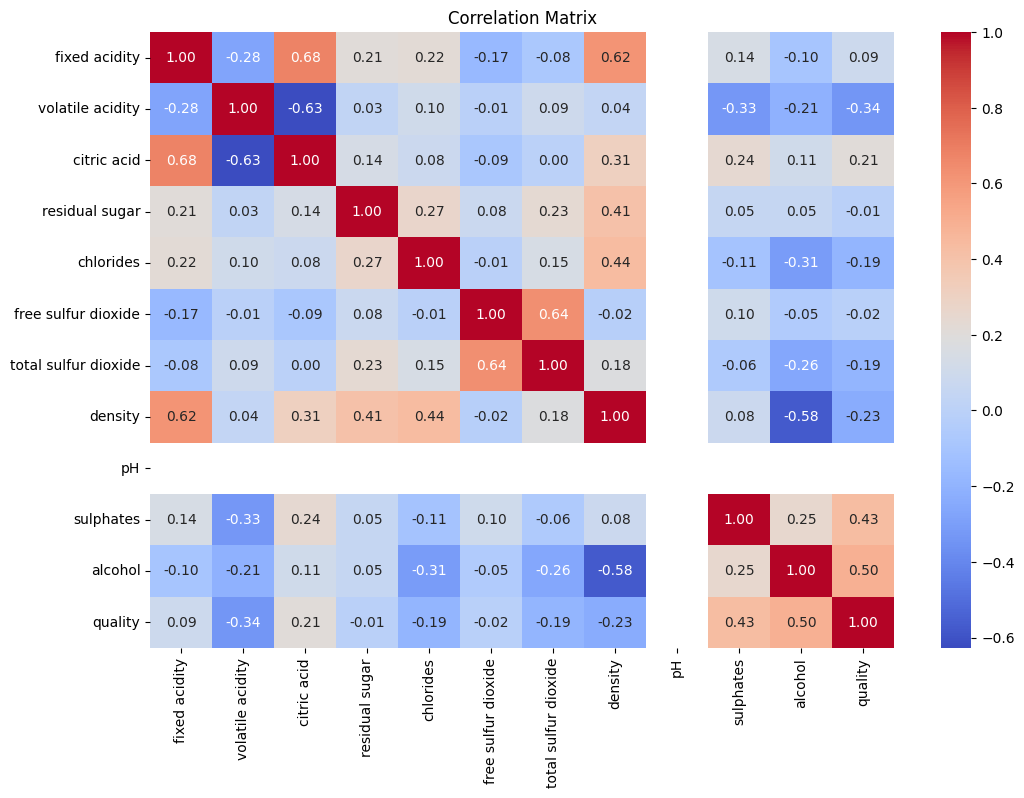

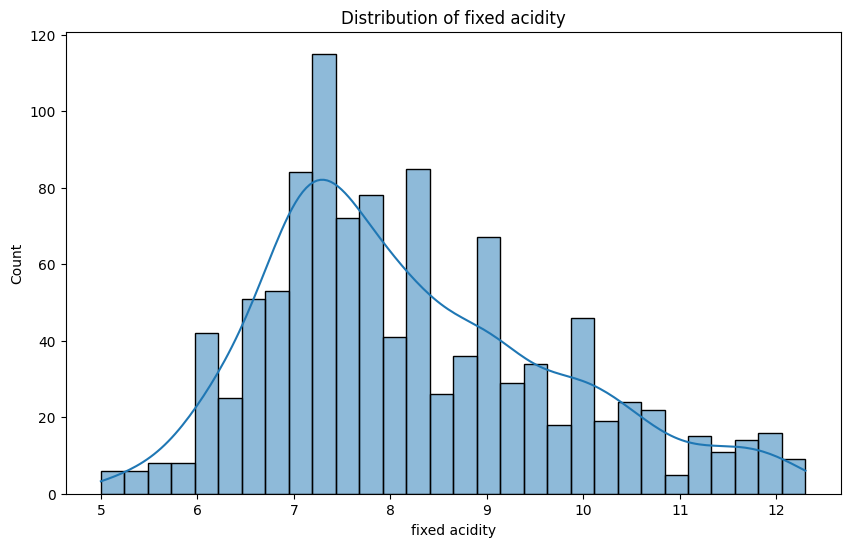

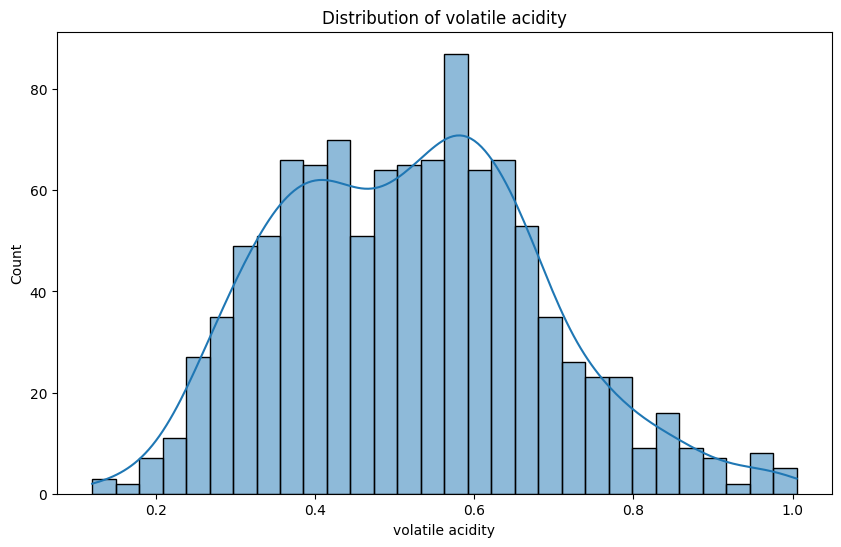

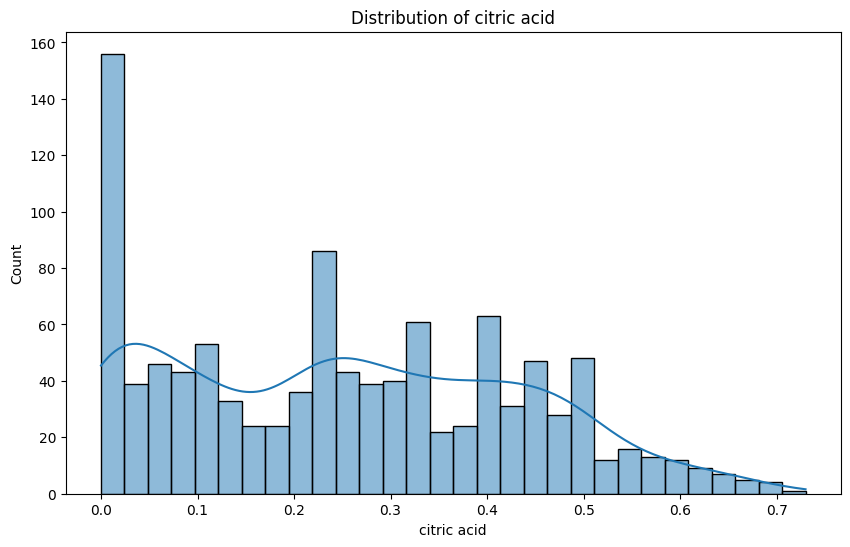

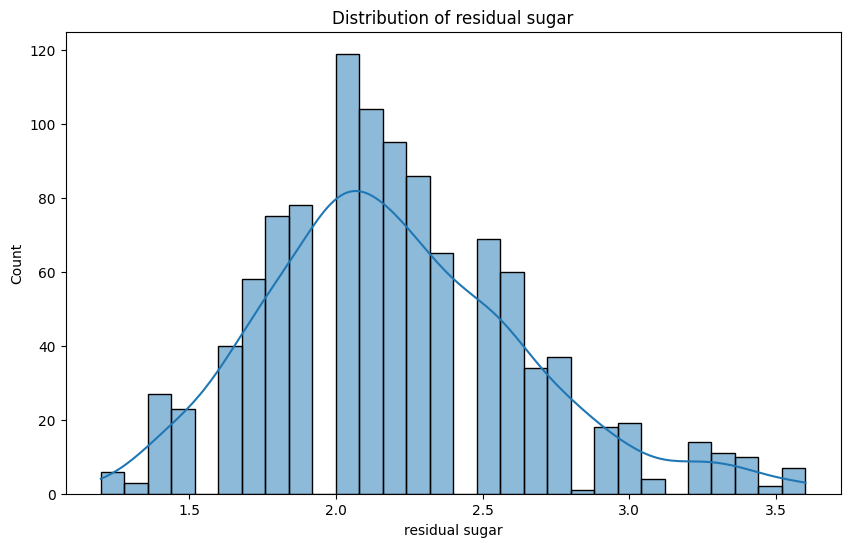

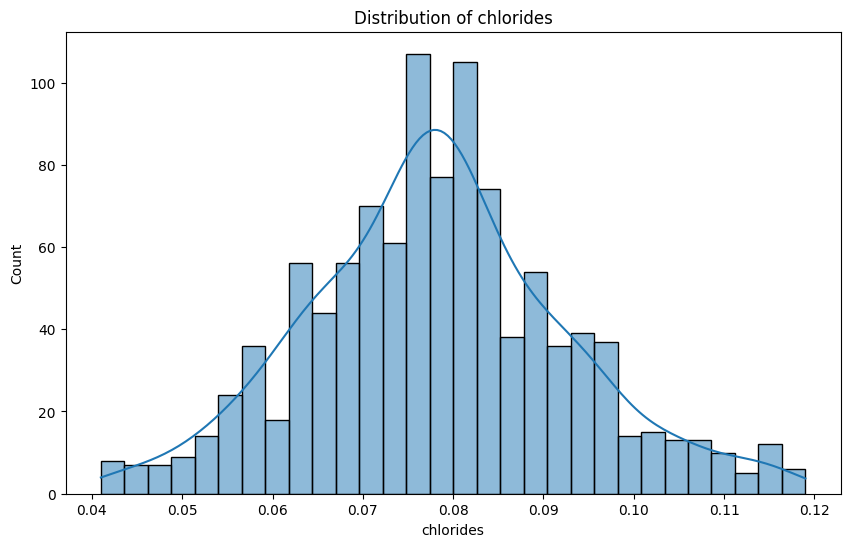

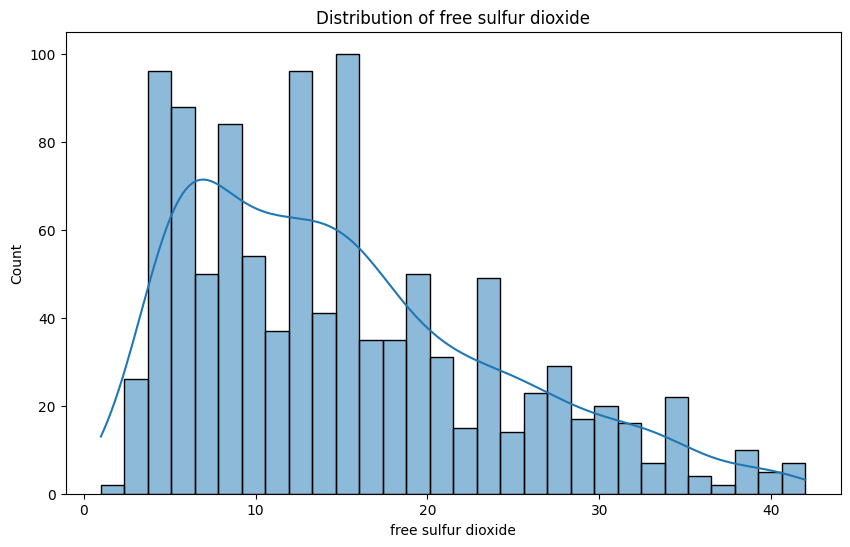

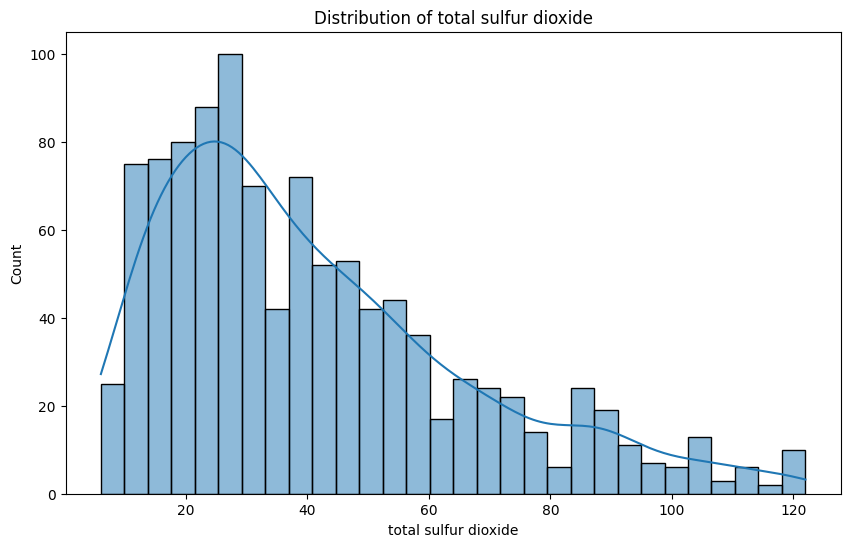

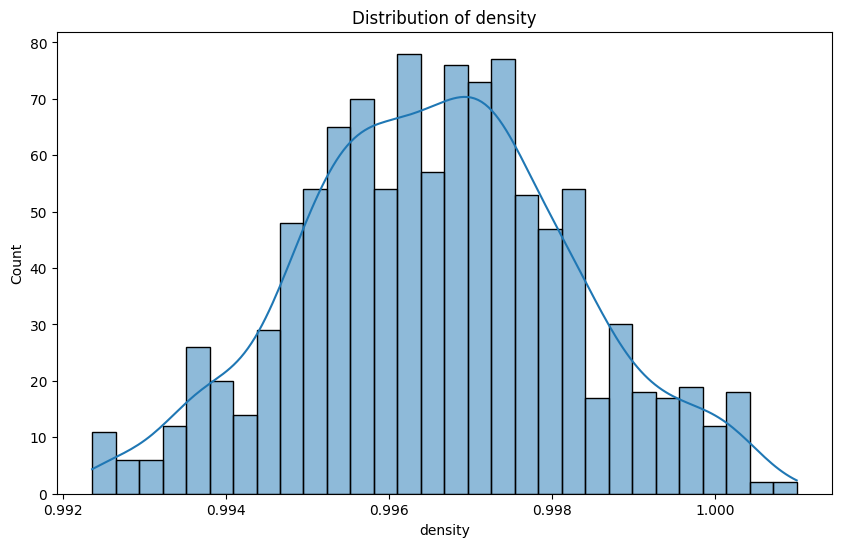

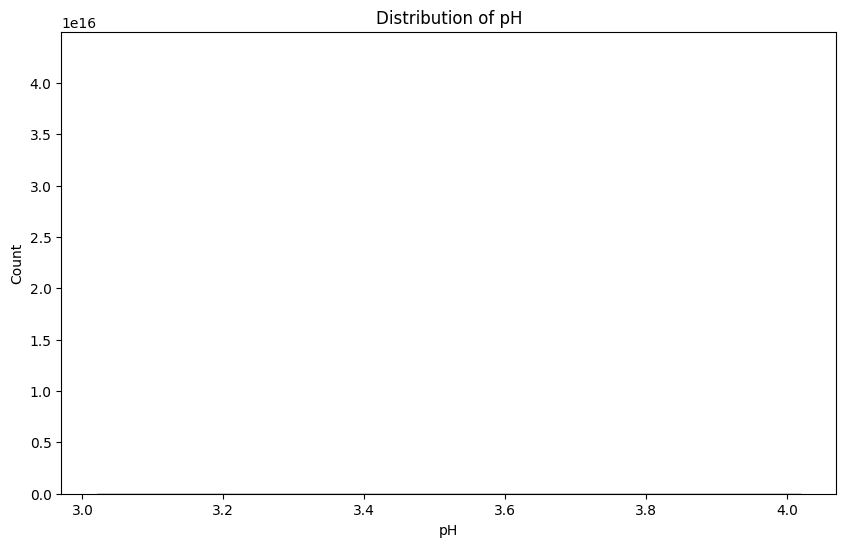

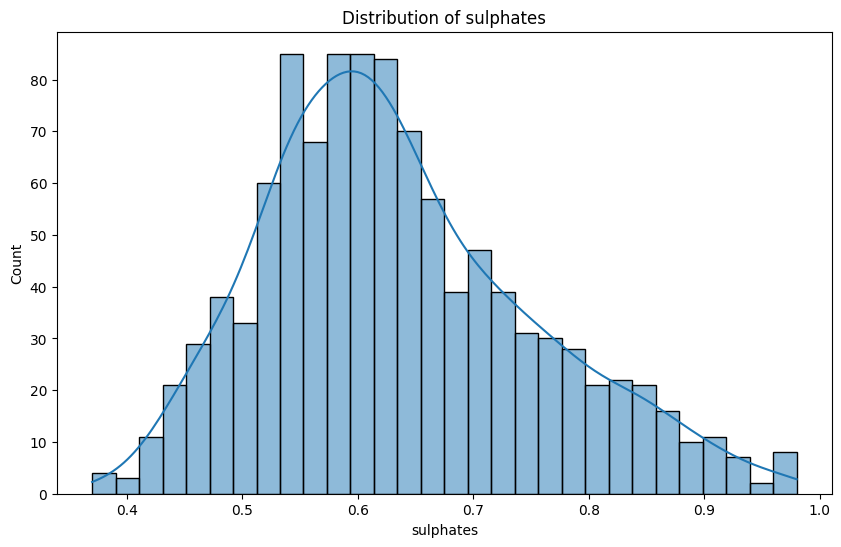

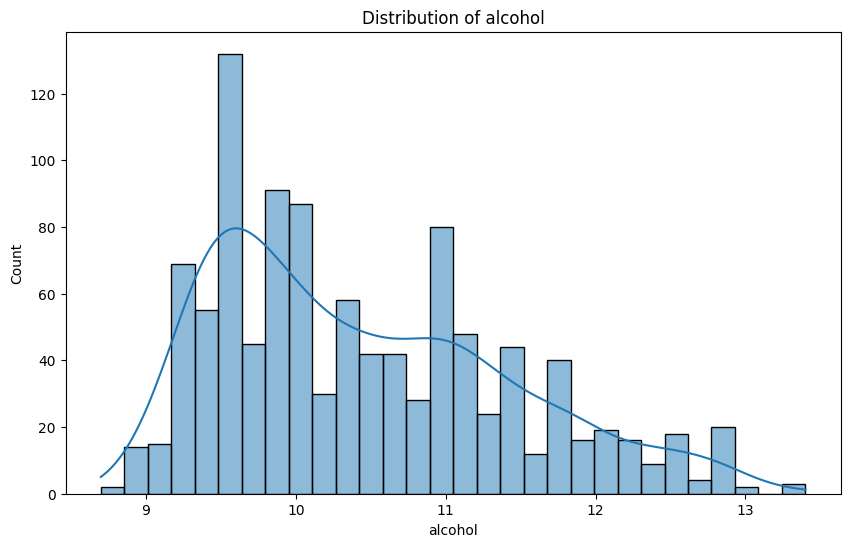

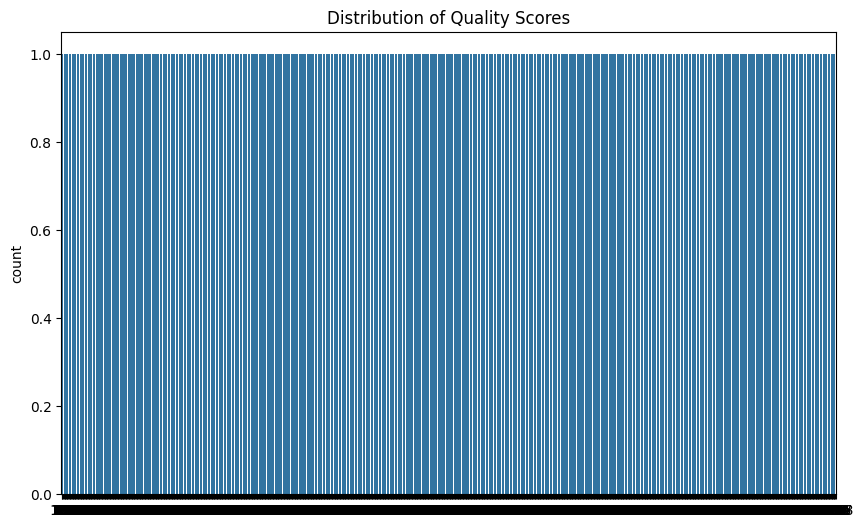

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(data.describe())

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Visualize distributions of input variables
for column in data.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

# Visualize the quality variable
plt.figure(figsize=(10, 6))
sns.countplot(data['quality'])
plt.title('Distribution of Quality Scores')
plt.show()


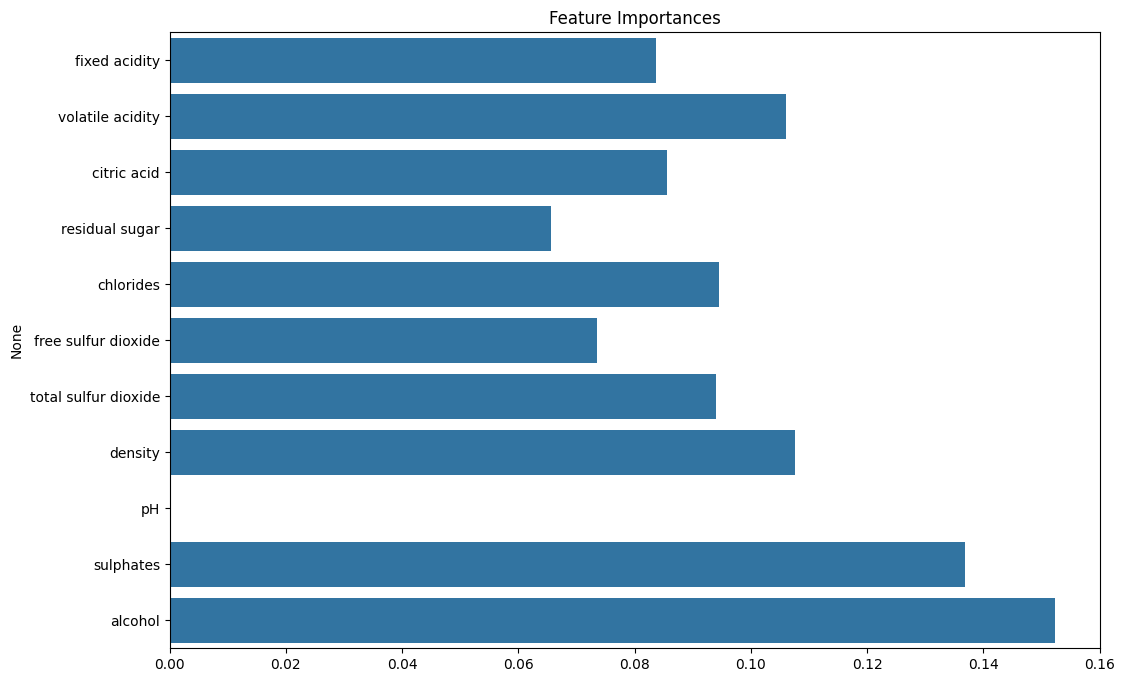

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Split data into features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Feature importance using Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=X.columns)
plt.title('Feature Importances')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate different classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier(),
                'SVM': SVC(),
                    'Gradient Boosting': GradientBoostingClassifier()
                    }

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Model: Logistic Regression
              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00         7
         5.0       0.66      0.68      0.67        87
         6.0       0.55      0.65      0.59        91
         7.0       0.47      0.25      0.33        28

    accuracy                           0.59       213
   macro avg       0.42      0.39      0.40       213
weighted avg       0.56      0.59      0.57       213

[[ 0  6  1  0]
 [ 0 59 27  1]
 [ 0 25 59  7]
 [ 0  0 21  7]]
--------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00         7
         5.0       0.63      0.60      0.61        87
         6.0       0.56      0.60      0.58        91
         7.0       0.40      0.36      0.38        28

    accuracy                           0.55       213
   macro avg       0.40      0.39      0.39       213
weighted avg       0.55  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Model: Gradient Boosting
              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00         7
         5.0       0.73      0.68      0.70        87
         6.0       0.61      0.73      0.66        91
         7.0       0.63      0.43      0.51        28

    accuracy                           0.64       213
   macro avg       0.49      0.46      0.47       213
weighted avg       0.64      0.64      0.64       213

[[ 0  4  3  0]
 [ 2 59 25  1]
 [ 2 17 66  6]
 [ 0  1 15 12]]
--------------------------------------------------


In [8]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
            }

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Best Random Forest Model Performance:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.6842723004694836
Best Random Forest Model Performance:
              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00         7
         5.0       0.80      0.76      0.78        87
         6.0       0.65      0.81      0.72        91
         7.0       0.75      0.43      0.55        28

    accuracy                           0.71       213
   macro avg       0.55      0.50      0.51       213
weighted avg       0.70      0.71      0.70       213

[[ 0  4  3  0]
 [ 0 66 21  0]
 [ 0 13 74  4]
 [ 0  0 16 12]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


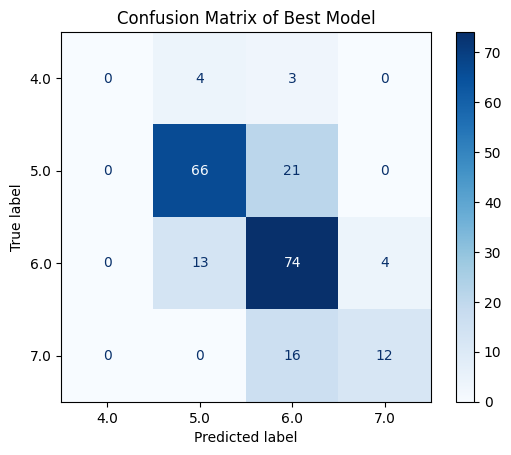

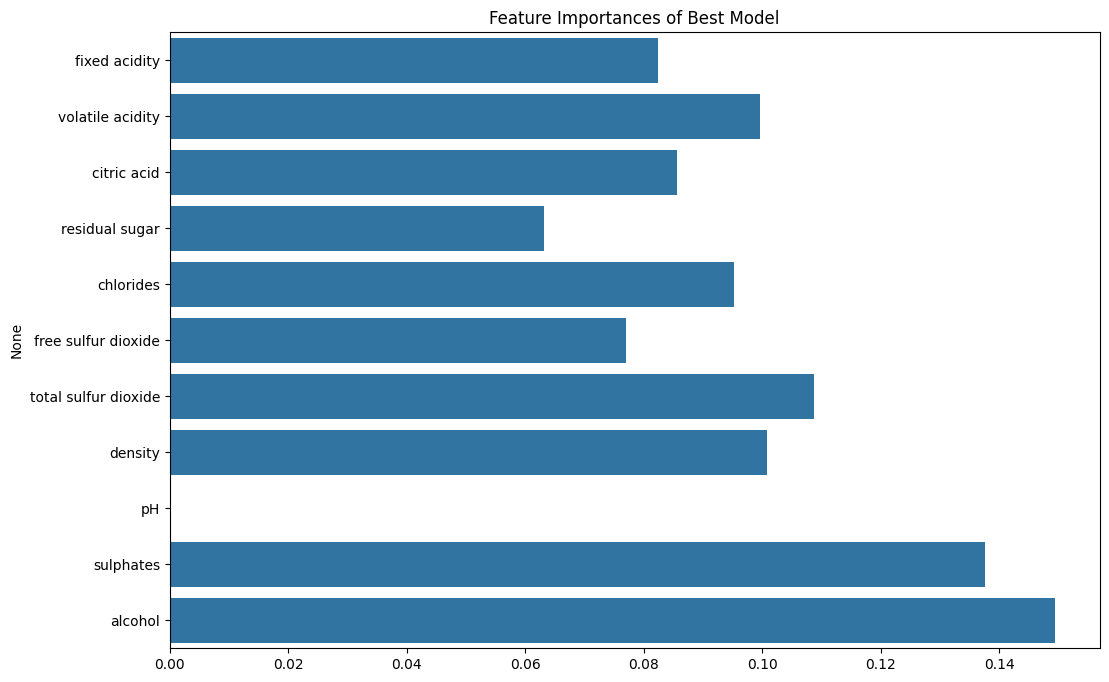

In [9]:
# Visualization of the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix of Best Model')
plt.show()

# Feature importances from the best model
importances = best_model.feature_importances_
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=X.columns)
plt.title('Feature Importances of Best Model')
plt.show()
